## Building complexe newtorks  

- with functional api we can create multi model structure 
      
and offer us the possibility to answer to more complexe questions    
with multi inputs and/or multi outputs, by sharing layers between models,          
concatenate results. Create a model in graph.

#### 1) Model with  1 input and 4 outputs
#### 2) Model with  3 inputs and 1 output
#### 3) Practical case : model with  1 input and 2 outputs



In [1]:
# import the necessary packages
import os
import glob
from pathlib import Path

from keras import layers
from keras.models import Model, Sequential
from keras.layers import concatenate
from keras.utils.vis_utils import plot_model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf

from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2


Using TensorFlow backend.
C:\ProgramData\Anaconda33\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda33\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda33\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda33\lib\site-packages\tensorflow\python\framework\dtype

#### Exemples of multi model

- Let's create a sub-model to build complexe networks

In [2]:
def build_submodel(inputs):
    """ create a network submodel """
    x = layers.Dense(10, activation='relu')(inputs)
    x = layers.Dense(20, activation='relu')(x)
    x = layers.Dense(10, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    return x

#### create a complexe model with one input and four outputs

In [3]:
def create_one_input_four_outputs(inputShape=(10,)):
    """ create a model with one inputs ond four outputs """
    
    inputs = Input(shape=inputShape)
    
    # we create 4 models, but they can be all different
    model1 = build_submodel(inputs)
    model2 = build_submodel(inputs)
    model3 = build_submodel(inputs)
    model4 = build_submodel(inputs)
    
    model = Model(inputs=inputs,
                  outputs=[model1, model2, model3, model4],
                  name="oneIfourO")
    return model

model_complexe = create_one_input_four_outputs()


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model_complexe.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 10)           110         input_1[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 10)           110         input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 10)           110         input_1[0][0]                    
__________________________________________________________________________________________________
dense_13 (

## 1) Model with  1 input and 4 outputs
#### so we can have a multi questionning system, and answering system


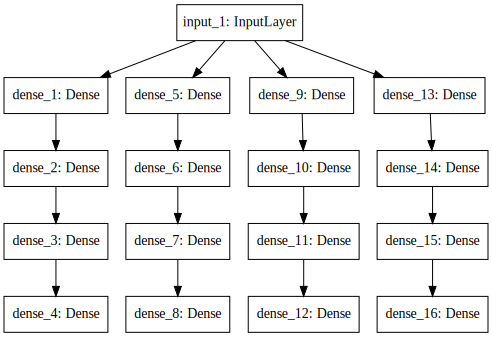

In [5]:
SVG(model_to_dot(model_complexe).create(prog='dot', format='svg'))

## 2) Model with  3 inputs and 1 output

In [6]:
from keras.optimizers import Adagrad

## first network
first_input = Input(shape=(2,), name='Network1')
first_net = Dense(1, )(first_input)

## second
second_input = Input(shape=(10,), name='Network2')
second_net = build_submodel(second_input)
 
## third    
third_input = Input(shape=(10,), name='Network3')
third_net = build_submodel(third_input)

## merge results of first one with the second 
merge_one = concatenate([first_net, second_net])

## merge results with the third network 
merge_two = concatenate([merge_one, third_net])

model = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)

ada_grad = Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model.compile(optimizer=ada_grad, loss='binary_crossentropy', metrics=['accuracy'])

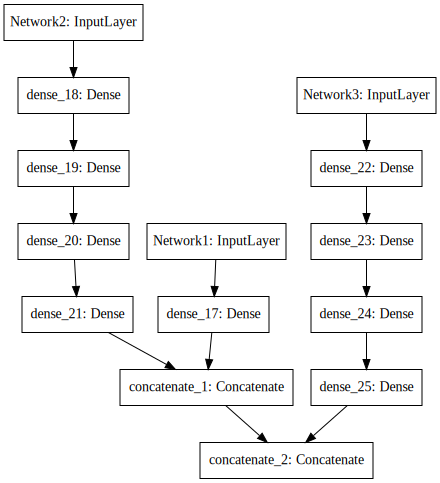

In [7]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## 3) Practical case : model with  1 input and 2 outputs
- input :
  image picture
- ouputs :
  color detection
  and cloth category


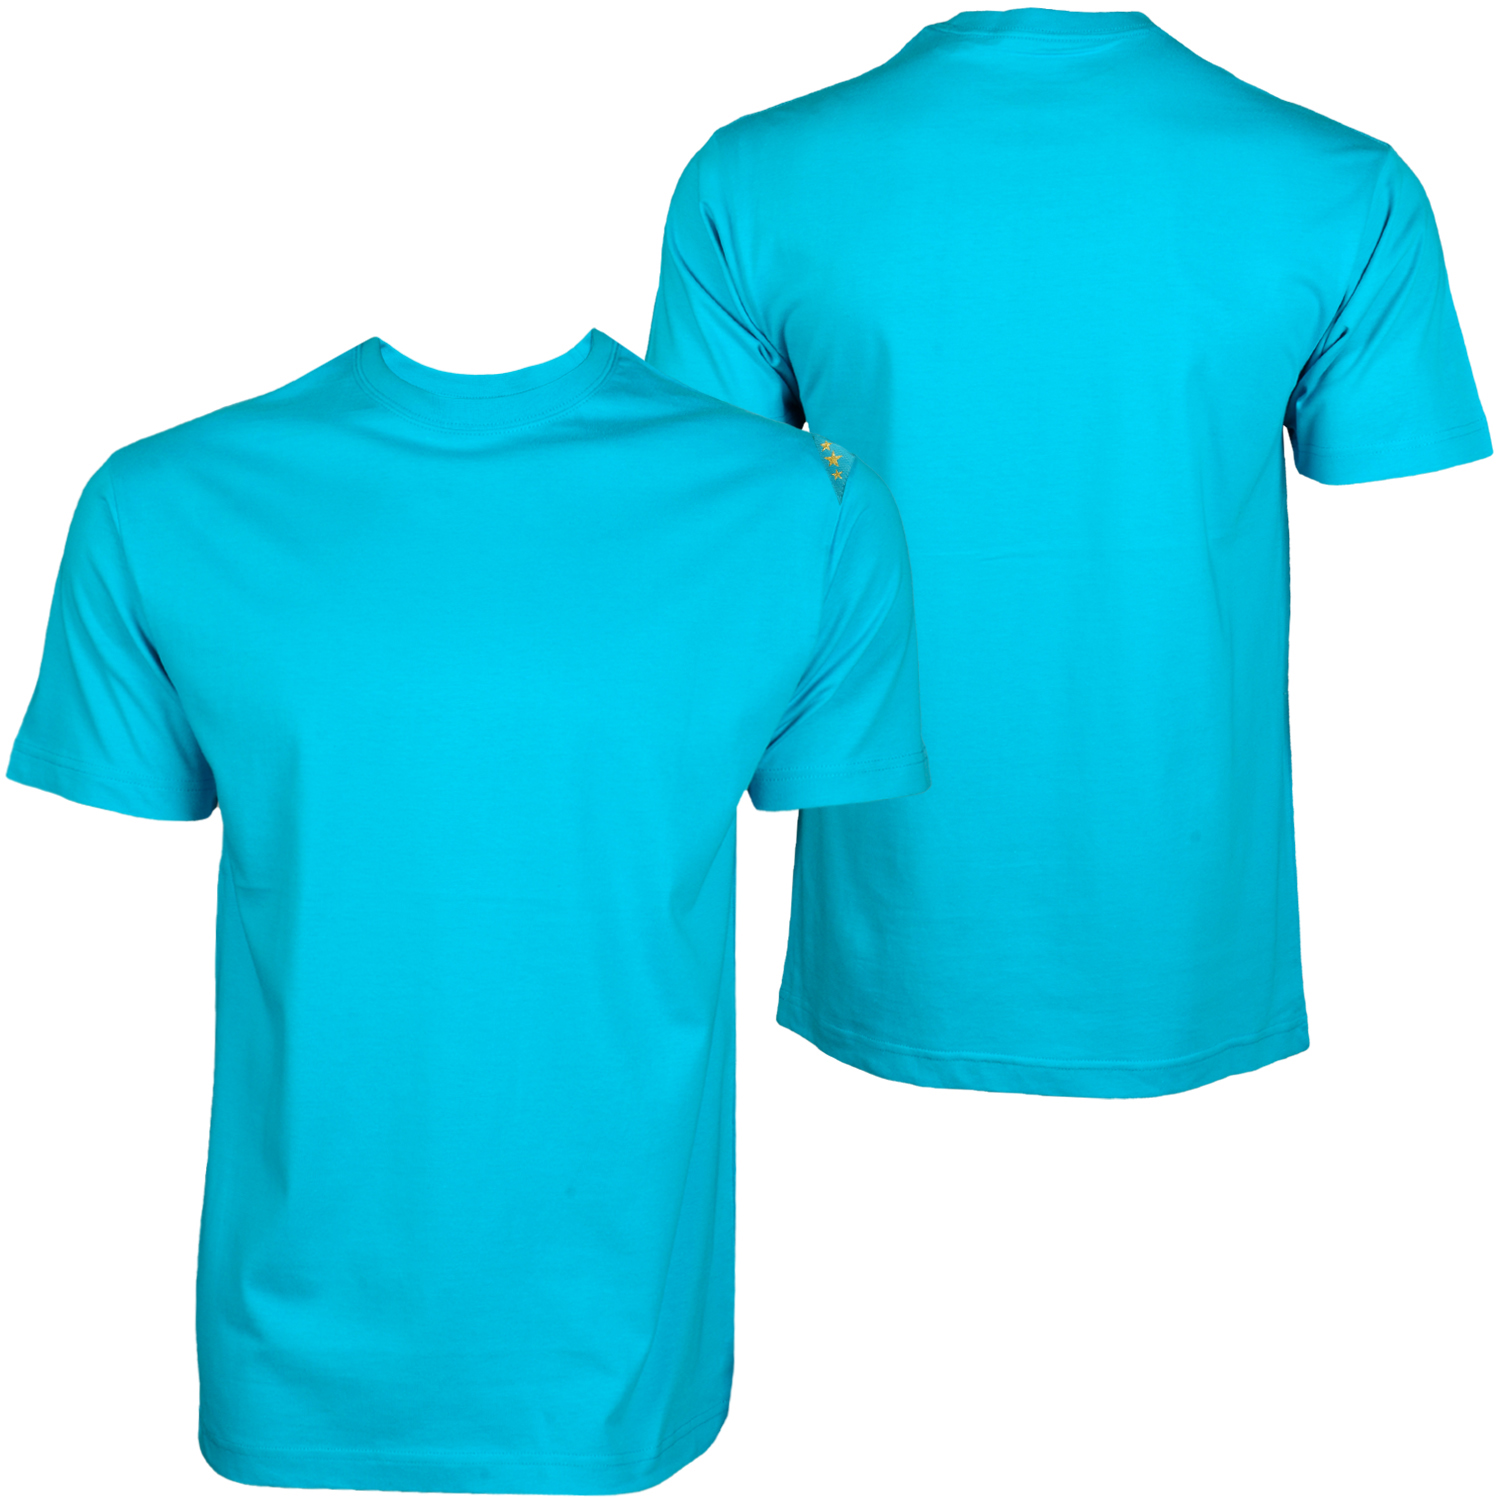

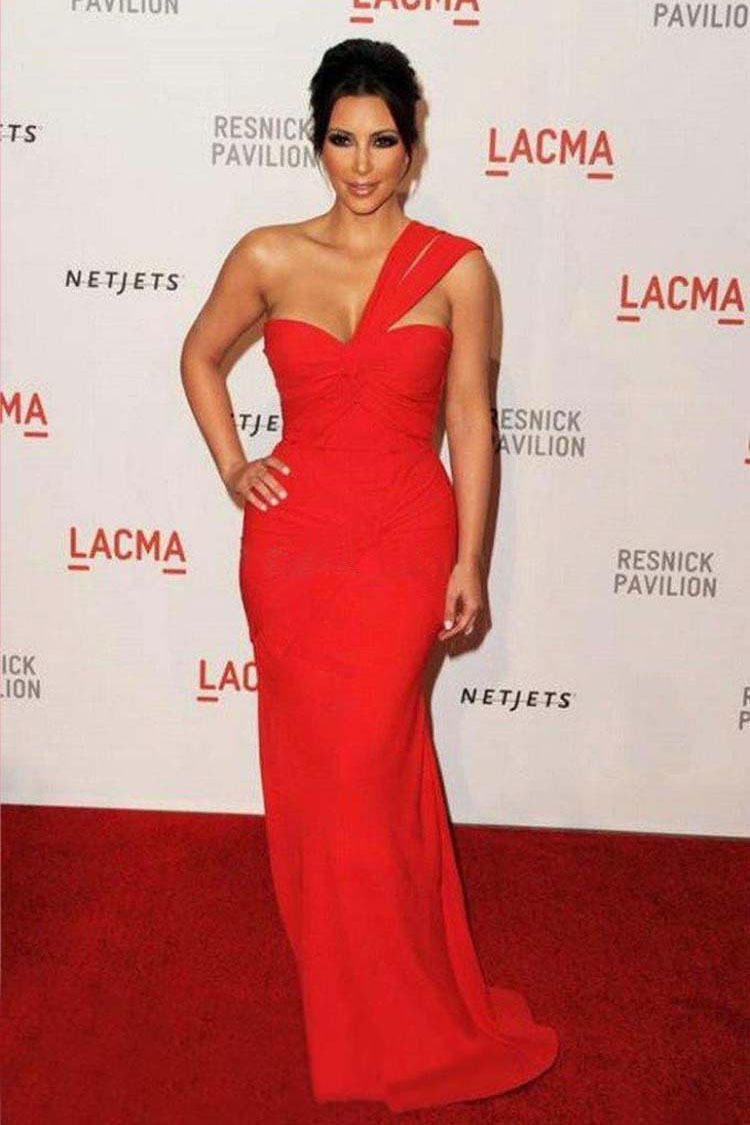

In [8]:
from PIL import Image
def disp(image):
    """ display colored image """
    image_file = Image.open(image)
    display(image_file)
    
disp('./dataset/blue_shirt/00000182.jpg')
disp('./dataset/red_dress/00000322.jpg')

In [9]:
## Load Data

# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions
EPOCHS = 50
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (96, 96, 3)

# grab the image paths and randomly shuffle them
print("[INFO] loading images...")
imagePaths = glob.glob("./dataset/**/*.jpg")

# initialize the data, clothing category labels (i.e., shirts, jeans,
# dresses, etc.) along with the color labels (i.e., red, blue, etc.)
data = []
categoryLabels = []
colorLabels = []

# loop over the input images
for imagePath in imagePaths:
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = img_to_array(image)
	data.append(image)

	# extract the clothing color and category from the path and
	# update the respective lists
	(color, cat) = imagePath.split(os.path.sep)[-2].split("_")
	categoryLabels.append(cat)
	colorLabels.append(color)

# scale the raw pixel intensities to the range [0, 1] and convert to
# a NumPy array
data = np.array(data, dtype="float") / 255.0
print("[INFO] data matrix: {} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

# convert the label lists to NumPy arrays prior to binarization
categoryLabels = np.array(categoryLabels)
colorLabels = np.array(colorLabels)

# binarize both sets of labels
print("[INFO] binarizing labels...")
categoryLB = LabelBinarizer()
colorLB = LabelBinarizer()
categoryLabels = categoryLB.fit_transform(categoryLabels)
colorLabels = colorLB.fit_transform(colorLabels)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
split = train_test_split(data, categoryLabels, colorLabels, test_size=0.2, random_state=42)
(trainX, testX, trainCategoryY, testCategoryY, trainColorY, testColorY) = split


[INFO] loading images...
[INFO] data matrix: 2096 images (452.74MB)
[INFO] binarizing labels...


In [10]:
class FashionNet:
	@staticmethod
	def build_category_branch(inputs, numCategories,
		finalAct="softmax", chanDim=-1):
		# utilize a lambda layer to convert the 3 channel input to a
		# grayscale representation
		x = Lambda(lambda c: tf.image.rgb_to_grayscale(c))(inputs)

		# CONV => RELU => POOL
		x = Conv2D(32, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(3, 3))(x)
		x = Dropout(0.25)(x)

		# (CONV => RELU) * 2 => POOL
		x = Conv2D(64, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = Conv2D(64, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
		x = Dropout(0.25)(x)

		# (CONV => RELU) * 2 => POOL
		x = Conv2D(128, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = Conv2D(128, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
		x = Dropout(0.25)(x)

		# define a branch of output layers for the number of different
		# clothing categories (i.e., shirts, jeans, dresses, etc.)
		x = Flatten()(x)
		x = Dense(256)(x)
		x = Activation("relu")(x)
		x = BatchNormalization()(x)
		x = Dropout(0.5)(x)
		x = Dense(numCategories)(x)
		x = Activation(finalAct, name="category_output")(x)

		# return the category prediction sub-network
		return x

	@staticmethod
	def build_color_branch(inputs, numColors, finalAct="softmax",
		chanDim=-1):
		# CONV => RELU => POOL
		x = Conv2D(16, (3, 3), padding="same")(inputs)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(3, 3))(x)
		x = Dropout(0.25)(x)

		# CONV => RELU => POOL
		x = Conv2D(32, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
		x = Dropout(0.25)(x)

		# CONV => RELU => POOL
		x = Conv2D(32, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
		x = Dropout(0.25)(x)

		# define a branch of output layers for the number of different
		# colors (i.e., red, black, blue, etc.)
		x = Flatten()(x)
		x = Dense(128)(x)
		x = Activation("relu")(x)
		x = BatchNormalization()(x)
		x = Dropout(0.5)(x)
		x = Dense(numColors)(x)
		x = Activation(finalAct, name="color_output")(x)

		# return the color prediction sub-network
		return x

	@staticmethod
	def build(width, height, numCategories, numColors,
		finalAct="softmax"):
		# initialize the input shape and channel dimension (this code
		# assumes you are using TensorFlow which utilizes channels
		# last ordering)
		inputShape = (height, width, 3)
		chanDim = -1

		# construct both the "category" and "color" sub-networks
		inputs = Input(shape=inputShape)
		categoryBranch = FashionNet.build_category_branch(inputs,
			numCategories, finalAct=finalAct, chanDim=chanDim)
		colorBranch = FashionNet.build_color_branch(inputs,
			numColors, finalAct=finalAct, chanDim=chanDim)

		# create the model using our input (the batch of images) and
		# two separate outputs -- one for the clothing category
		# branch and another for the color branch, respectively
		model = Model(
			inputs=inputs,
			outputs=[categoryBranch, colorBranch],
			name="fashionnet")

		# return the constructed network architecture
		return model

# initialize our FashionNet multi-output network
model = FashionNet.build(96, 96,
	numCategories=len(categoryLB.classes_),
	numColors=len(colorLB.classes_),
	finalAct="softmax")
    

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


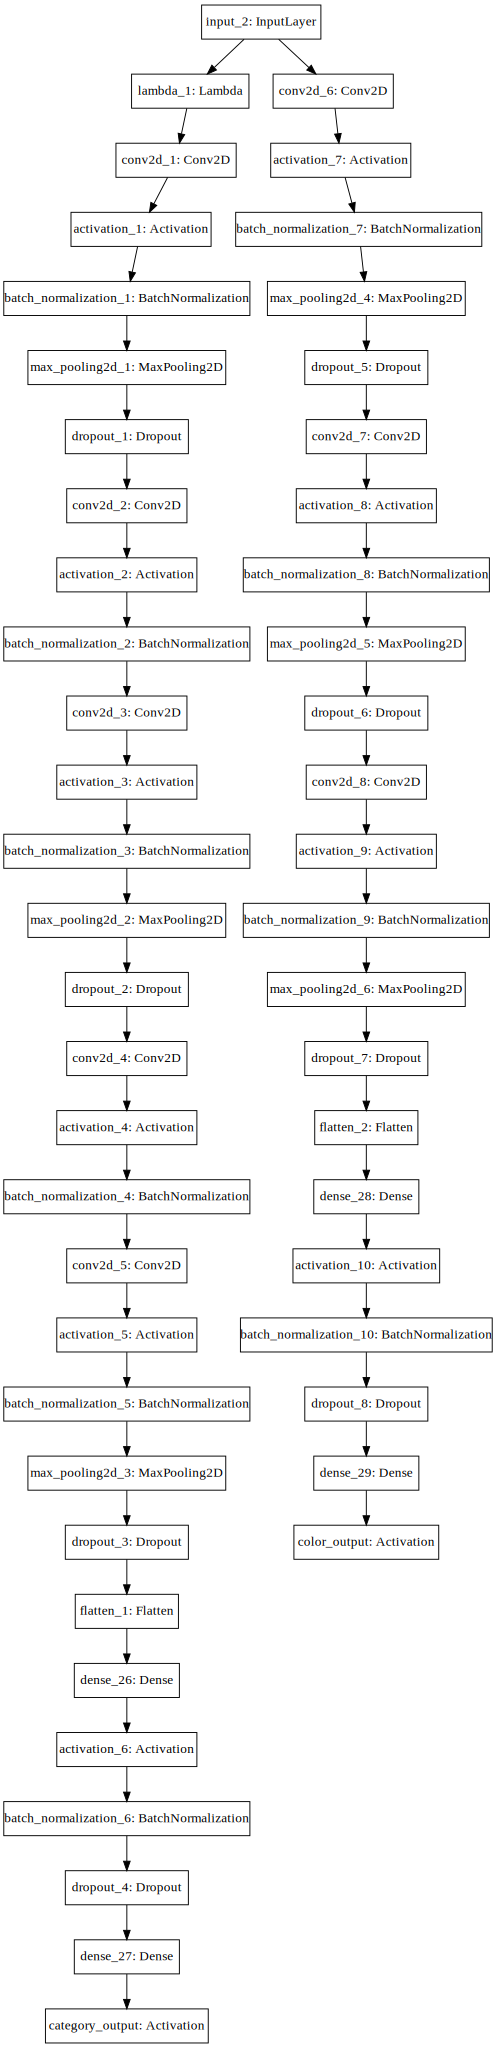

In [11]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### Training

In [12]:
# define two dictionaries: one that specifies the loss method for
# each output of the network along with a second dictionary that
# specifies the weight per loss
losses = {
	"category_output": "categorical_crossentropy",
	"color_output": "categorical_crossentropy",
}
lossWeights = {"category_output": 1.0, "color_output": 1.0}

# initialize the optimizer and compile the model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,
	metrics=["accuracy"])

# train the network to perform multi-output classification
H = model.fit(trainX,
	{"category_output": trainCategoryY, "color_output": trainColorY},
	validation_data=(testX,
		{"category_output": testCategoryY, "color_output": testColorY}),
	epochs=EPOCHS,
	verbose=1)


[INFO] compiling model...
Instructions for updating:
Use tf.cast instead.
Train on 1676 samples, validate on 420 samples
Epoch 1/50
1676/1676 [==============================] - 42s 25ms/step - loss: 0.9709 - category_output_loss: 0.6474 - color_output_loss: 0.3235 - category_output_acc: 0.8085 - color_output_acc: 0.8813 - val_loss: 0.4315 - val_category_output_loss: 0.3108 - val_color_output_loss: 0.1208 - val_category_output_acc: 0.9190 - val_color_output_acc: 0.9548
Epoch 2/50
1676/1676 [==============================] - 38s 23ms/step - loss: 0.4094 - category_output_loss: 0.3221 - color_output_loss: 0.0873 - category_output_acc: 0.8986 - color_output_acc: 0.9696 - val_loss: 0.5467 - val_category_output_loss: 0.3972 - val_color_output_loss: 0.1495 - val_category_output_acc: 0.8571 - val_color_output_acc: 0.9476
Epoch 3/50
1676/1676 [==============================] - 38s 23ms/step - loss: 0.3242 - category_output_loss: 0.2541 - color_output_loss: 0.0701 - category_output_acc: 0.9171 -

1676/1676 [==============================] - 39s 23ms/step - loss: 0.0195 - category_output_loss: 0.0070 - color_output_loss: 0.0125 - category_output_acc: 0.9988 - color_output_acc: 0.9970 - val_loss: 0.2473 - val_category_output_loss: 0.2186 - val_color_output_loss: 0.0287 - val_category_output_acc: 0.9452 - val_color_output_acc: 0.9881
Epoch 47/50
1676/1676 [==============================] - 39s 23ms/step - loss: 0.0438 - category_output_loss: 0.0325 - color_output_loss: 0.0113 - category_output_acc: 0.9887 - color_output_acc: 0.9976 - val_loss: 1.0729 - val_category_output_loss: 1.0408 - val_color_output_loss: 0.0321 - val_category_output_acc: 0.7857 - val_color_output_acc: 0.9857
Epoch 48/50
1676/1676 [==============================] - 39s 23ms/step - loss: 0.0348 - category_output_loss: 0.0228 - color_output_loss: 0.0120 - category_output_acc: 0.9922 - color_output_acc: 0.9976 - val_loss: 0.3854 - val_category_output_loss: 0.3328 - val_color_output_loss: 0.0526 - val_category_out

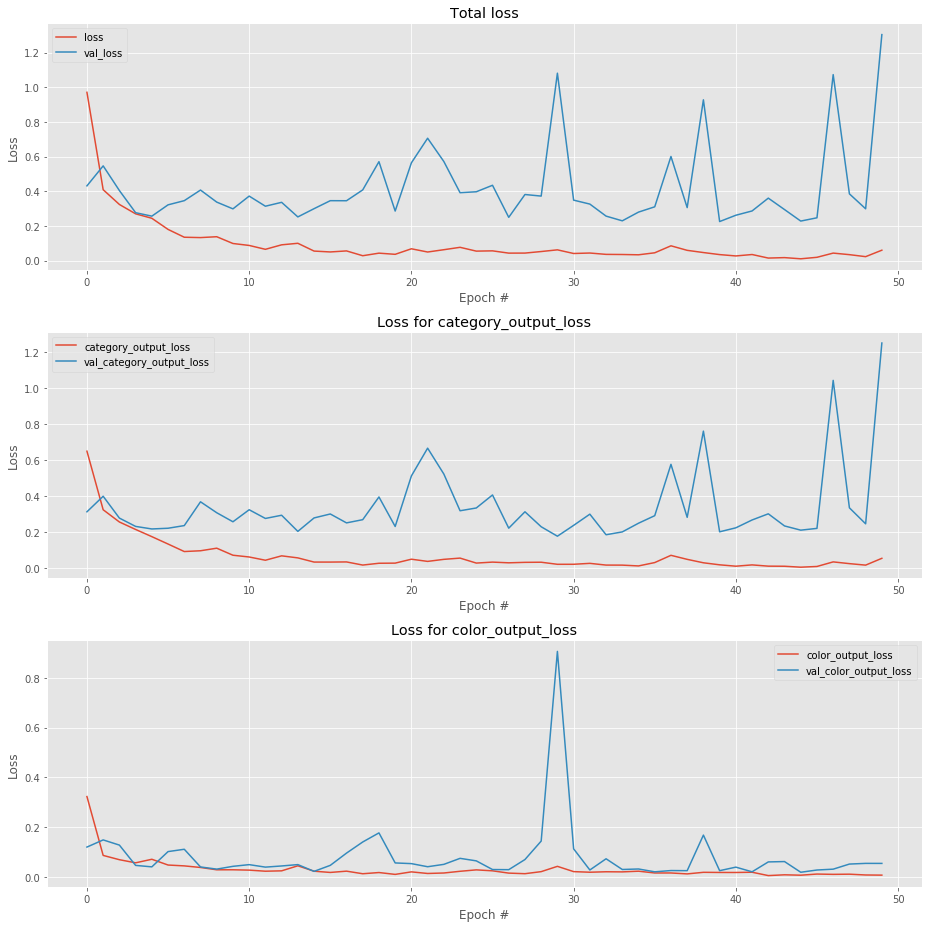

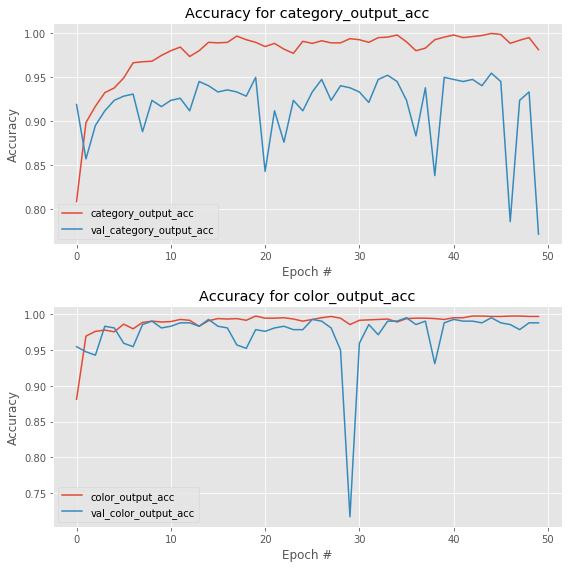

In [13]:


# plot the total loss, category loss, and color loss
lossNames = ["loss", "category_output_loss", "color_output_loss"]
plt.style.use("ggplot")
(fig, ax) = plt.subplots(3, 1, figsize=(13, 13))

# loop over the loss names
for (i, l) in enumerate(lossNames):
	# plot the loss for both the training and validation data
	title = "Loss for {}".format(l) if l != "loss" else "Total loss"
	ax[i].set_title(title)
	ax[i].set_xlabel("Epoch #")
	ax[i].set_ylabel("Loss")
	ax[i].plot(np.arange(0, EPOCHS), H.history[l], label=l)
	ax[i].plot(np.arange(0, EPOCHS), H.history["val_" + l],
		label="val_" + l)
	ax[i].legend()

plt.tight_layout()

# create a new figure for the accuracies
accuracyNames = ["category_output_acc", "color_output_acc"]
plt.style.use("ggplot")
(fig, ax) = plt.subplots(2, 1, figsize=(8, 8))

# loop over the accuracy names
for (i, l) in enumerate(accuracyNames):
	# plot the loss for both the training and validation data
	ax[i].set_title("Accuracy for {}".format(l))
	ax[i].set_xlabel("Epoch #")
	ax[i].set_ylabel("Accuracy")
	ax[i].plot(np.arange(0, EPOCHS), H.history[l], label=l)
	ax[i].plot(np.arange(0, EPOCHS), H.history["val_" + l],
		label="val_" + l)
	ax[i].legend()

plt.tight_layout()


#### This model provides two results, and we can see that the model for cloth classifier is overtting, and not the color detection one